In [159]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [192]:
### Question 1
# Canny Edge Detection

image_path = './cropped_1.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print(image)

[[163 164 166 169 170]
 [121 124 129 132 136]
 [ 60  64  66  70  73]
 [ 19  21  21  22  22]
 [ 16  15  14  12  12]]


In [194]:
# Gaussian Blur
def gkernel(size=3, sig=2):

    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

guassian_blur = gkernel(3,1)

#Image padding and gaussian smooth 
image_padded = np.full((7, 7), np.zeros(7), dtype=np.float32)
image_padded[1:6, 1:6] = image

blurred = cv2.filter2D(image, -1, guassian_blur)
blurred_padded = np.full((7, 7), np.zeros(7), dtype=np.float32)
blurred_padded[1:6, 1:6] = blurred


#Sobel Filter
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
grad_x = np.array(cv2.filter2D(blurred_padded, -1, sobel_x), dtype=np.float32)

sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
grad_y = np.array(cv2.filter2D(blurred_padded, -1, sobel_y), dtype=np.float32)

print(grad_x)

[[   0.  284.   10.   14.    8. -298.    0.]
 [   0.  403.   15.   20.   12. -423.    0.]
 [   0.  448.   19.   25.   16. -473.    0.]
 [   0.  286.   15.   19.   13. -305.    0.]
 [   0.  148.    8.    8.    5. -156.    0.]
 [   0.   67.    2.    1.   -1.  -68.    0.]
 [   0.   36.    0.    0.   -2.  -36.    0.]]


In [ ]:


# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(grad_x[1:6, 1:6]**2 + grad_y[1:6, 1:6]**2)
gradient_direction = np.arctan2(grad_y[1:6, 1:6], grad_x[1:6, 1:6]) * (180/np.pi)
print(gradient_direction)
print()
print(gradient_magnitude)


In [190]:
# Non-maximum suppression
edges = np.zeros_like(image)
M = image.shape[0]
N = image.shape[1]

for i in range(1, M-1): # i = 2
    for j in range(1, N-1): # j = 0
        try:
            q = 0
            r = 0
            
            # Get gradient magnitudes for neighboring pixels based on gradient direction
            if (0 <= gradient_direction[i, j] < 22.5) or (157.5 <= gradient_direction[i, j] <= 180):
                q = gradient_magnitude[i, j+1]
                r = gradient_magnitude[i, j-1]
            elif (22.5 <= gradient_direction[i, j] < 67.5):
                q = gradient_magnitude[i+1, j-1]
                r = gradient_magnitude[i-1, j+1]
            elif (67.5 <= gradient_direction[i, j] < 112.5):
                q = gradient_magnitude[i+1, j]
                r = gradient_magnitude[i-1, j]
            elif (112.5 <= gradient_direction[i, j] < 157.5):
                q = gradient_magnitude[i-1, j-1]
                r = gradient_magnitude[i+1, j+1]

            # Perform non-maximum suppression
            if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                edges[i, j] = gradient_magnitude[i, j]
            else:
                edges[i, j] = 0
        except IndexError as e:
            pass




[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0 255 255 255   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


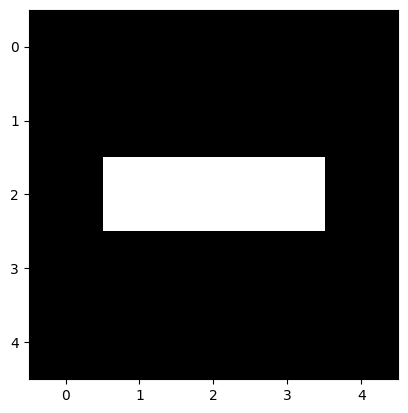

In [191]:
 # Apply double thresholding
high_threshold = 0.7 * np.max(edges)
low_threshold = 0.3 * np.max(edges)
strong_edges = (edges > high_threshold)
weak_edges = (edges > low_threshold) & (edges <= high_threshold)

# Thresholding
edges[edges < low_threshold] = 0
edges[edges >= high_threshold] = 255

print(edges)

plt.imshow(edges, cmap = 'gray')

[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [255 255 255 255 255]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


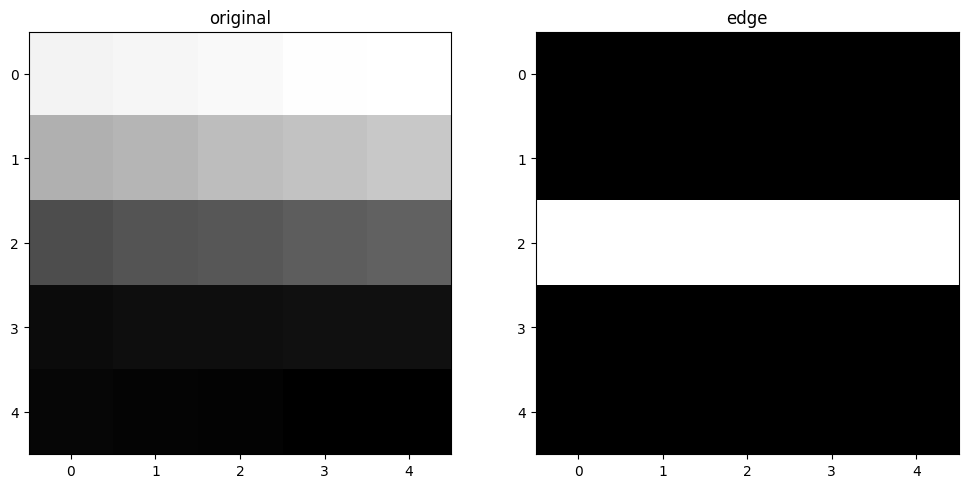

In [164]:
t_lower = 50  # Lower Threshold 
t_upper = 150  # Upper threshold 
  
# Applying the Canny Edge filter 
edge = cv2.Canny(image, t_lower, t_upper) 

print(edge)
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(image, cmap='gray') 
plt.subplot(1, 2, 2)
plt.title('edge')
plt.imshow(edge, cmap='gray') 

[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]]


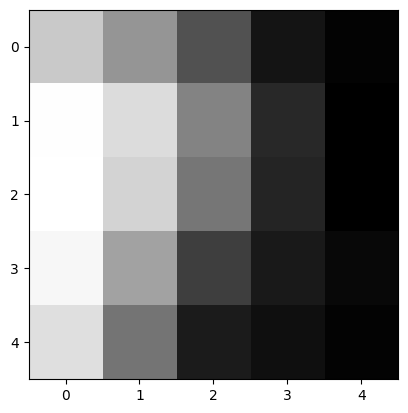

In [165]:
### Question 2
# Harris Corner Detection Algorithm

# Read the image
img_path = './cropped.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')

# Gaussian blur kernel
gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

# Smooth the image
image_padded = np.full((7, 7), np.average(image), dtype=np.float32)
image_padded[1:6, 1:6] = image
smooth = cv2.filter2D(image_padded, -1, gaussian)[1:6, 1:6]


# Compute gradients using Sobel operator
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
grad_x = cv2.filter2D(smooth, -1, sobel_x)
grad_y = cv2.filter2D(smooth, -1, sobel_y)


# Compute elements of the auto-correlation matrix
ixx = grad_x * grad_x
ixy = grad_x * grad_y
iyy = grad_y * grad_y

# Smooth the elements of the auto-correlation matrix
ixx_padded = np.full((7, 7), np.average(ixx), dtype=np.float32)
ixx_padded[1:6, 1:6] = ixx
ixy_padded = np.full((7, 7), np.average(ixy), dtype=np.float32)
ixy_padded[1:6, 1:6] = ixy
iyy_padded = np.full((7, 7), np.average(iyy), dtype=np.float32)
iyy_padded[1:6, 1:6] = iyy

# Gaussian blur the auto-correlation matrices
sxx = cv2.filter2D(ixx_padded, -1, gaussian)[1:6, 1:6]
sxy = cv2.filter2D(ixy_padded, -1, gaussian)[1:6, 1:6]
syy = cv2.filter2D(iyy_padded, -1, gaussian)[1:6, 1:6]

# Compute Harris corner response
R = np.zeros((5, 5), dtype=np.float32)
for i in range(5):
    for j in range(5):
        M = np.array([[sxx[i, j], sxy[i, j]],
                        [sxy[i, j], syy[i, j]]], dtype=np.float32)
        lambdas = np.linalg.eigvals(M)
        R[i, j] = (lambdas[0] * lambdas[1]) - 0.05 * ((lambdas[0] + lambdas[1]) ** 2)


 # Thresholding
R_max = np.max(R)
thresholded_corners = np.zeros_like(image)
thresholded_corners[R > 0.05 * R_max] = 1
print(thresholded_corners)

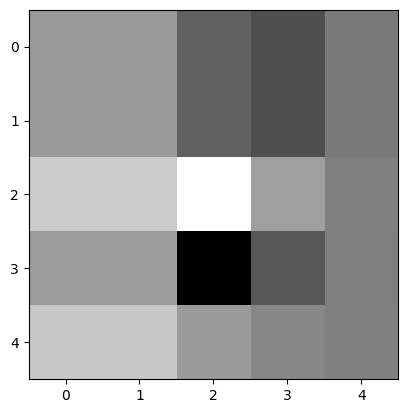

In [166]:
corner_response = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
plt.imshow(corner_response, cmap = 'gray')